# Analytical analysis of the three-way balance equation

Find equilibrium values, look at timescales, and saddle-node bifurcation locations.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import ipywidgets as widgets


## Pretty plots
plt.rcParams['figure.figsize'] = (12, 12) # set default figure size to 12x12 inches
plt.rc('text',usetex=True)
#font = {'family':'serif','size':16}
font = {'family':'serif','size':16, 'serif': ['computer modern roman']}
plt.rc('font',**font)
plt.rc('legend',**{'fontsize':14})
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']


In [2]:
f0 = 1.4e-4
ui = 8e-2
Cdi = 5.5e-3
g = 6.22e-2
alpha = 1
Cda = 0.00125
ua = 4
rho_a = 1.25
rho = 1028
R = 300e3

K = np.array([1e-20, 1e-10, 1., 10.,100,200, 300, 400, 500,1000, 1100, 1200, 1300, 1400, 2000])


## Calculate terms for solving the quadratic equation

In [3]:
def quad_terms(f0, R, ui, Cd, g, alpha, Cda, ua, rho_a, rho, K):
    
    A = alpha*g*g*Cd/(f0*f0*f0*R*R*R)
    B = -K/(R*R) - 2.*alpha*ui*g*Cd/(f0*f0*R*R)
    C = alpha*ui*ui*Cd/(f0*R) + (1-alpha)*Cda*ua*ua*rho_a/(f0*R*rho)

    return A, B, C

In [4]:
A, B, C = quad_terms(f0, R, ui, Cdi, g, alpha, Cda, ua, rho_a, rho, K)
print(A)
print(B)
print(C)

print('equilibrium depth = ', (-B - np.sqrt(B**2 - 4.*A*C))/(2.*A))

2.872073750134975e-10
[-3.10294785e-08 -3.10294785e-08 -3.10405896e-08 -3.11405896e-08
 -3.21405896e-08 -3.32517007e-08 -3.43628118e-08 -3.54739229e-08
 -3.65850340e-08 -4.21405896e-08 -4.32517007e-08 -4.43628118e-08
 -4.54739229e-08 -4.65850340e-08 -5.32517007e-08]
8.380952380952383e-07
equilibrium depth =  [        nan 54.01927818 52.5928824  49.63717064 41.36854795 37.08093532
 34.11970016 31.82674882 29.94995887 23.72401032 22.84174575 22.03536905
 21.2940974  20.60929106 17.36465094]


/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


In [5]:
K_colours = np.arange(-100., 2600, 10)


In [6]:
# h - dh/dt phase space
h = np.arange(-20,200,1.)
K_colours = np.arange(-100., 1500, .1)

dhdt = np.zeros((len(h), len(K_colours)))

for i in range(len(h)):
    for j in range(len(K_colours)):
        A, B, C = quad_terms(f0, R, ui, Cdi, g, alpha, Cda, ua, rho_a, rho, K_colours[j])
        dhdt[i,j] = A*h[i]*h[i] + B*h[i] + C

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


Text(0.5,0,'$\\kappa$ (m$^{2}$ s$^{-1}$)')

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


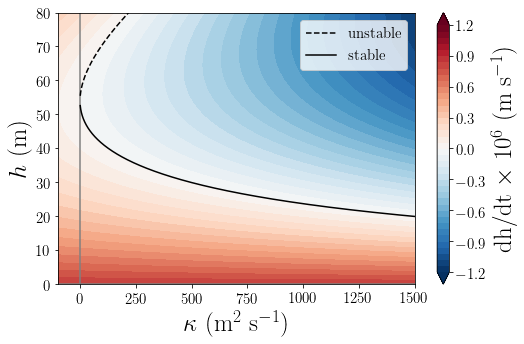

In [7]:
plt.figure(figsize=(8,5))
colour_limit = 1.2
im = plt.contourf(K_colours, h, dhdt*1e6, np.linspace(-colour_limit, colour_limit, 41),
             vmin=-colour_limit, vmax=colour_limit, cmap='RdBu_r', extend='both')
CB = plt.colorbar()
CB.set_label('dh/dt $\\times$ 10$^{6}$ (m s$^{-1}$)', fontsize=25)
CB.ax.tick_params(labelsize=15) 


K_eq = np.arange(1e-20, 2600, 1)
A, B, C = quad_terms(f0, R, ui, Cdi, g, alpha, Cda, ua, rho_a, rho, K_eq)

plt.plot(K_eq, (-B + np.sqrt(B**2 - 4.*A*C))/(2.*A), '--k', label='unstable')
plt.plot(K_eq, (-B - np.sqrt(B**2 - 4.*A*C))/(2.*A), '-k', label='stable')


plt.ylim(-0,80)
plt.xlim(-100, 1500)
plt.hlines(0,K_colours.min(), K_colours.max(), 'grey')
plt.vlines(0,-20,200, 'grey')
plt.legend(loc=1, fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('$h$ (m)', fontsize=25)
plt.xlabel('$\kappa$ (m$^{2}$ s$^{-1}$)', fontsize=25)

# plt.savefig('/Users/doddridge/Desktop/equilibrium_solutions.pdf', bbox_inches='tight')

## $\kappa_{crit}$ - the value at which the saddle node bifurcation happens

In [8]:
f0 = 1.4e-4
ui = 8e-2
Cdi = 5.5e-3
g = 6.22e-2
alpha = 0.87
alpha = np.linspace(0, 1, 100)
Cda = 0.00125
ua = 4
rho_a = 1.25
rho = 1028

In [9]:
k_crit = 2.*np.sqrt(alpha*Cdi*g*g*(alpha*Cdi*ui*ui*rho + 
                                   (1-alpha)*Cda*ua*ua*rho_a)/rho)/(f0*f0) - 2.*alpha*Cdi*ui*g/(f0*f0)
# print(k_crit)

k_crit_ui_lt_ug = 2.*alpha*Cdi*ui*g/(f0*f0) - 2.*np.sqrt(alpha*Cdi*g*g*(alpha*Cdi*ui*ui*rho - 
                                   (1-alpha)*Cda*ua*ua*rho_a)/rho)/(f0*f0)
# print(k_crit_ui_lt_ug)

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


(0, 800)

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


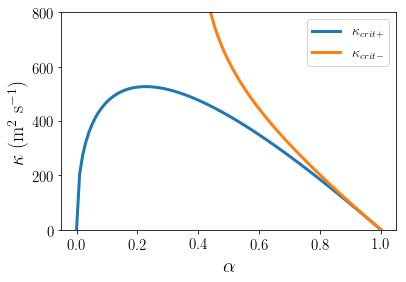

In [10]:
plt.plot(alpha, k_crit, label='$\kappa_{crit+}$', linewidth=3)
plt.plot(alpha, k_crit_ui_lt_ug, label='$\kappa_{crit-}$', linewidth=3)

plt.legend()

plt.ylabel(r'$\kappa$ (m$^{2}$ s$^{-1}$)', fontsize=20)
plt.xlabel(r'$\alpha$', fontsize=20)
plt.tick_params(labelsize=15)
# plt.xlim(0.8, 1)
plt.ylim(0, 800)

# plt.savefig('/Users/doddridge/Desktop/kappa_crit_alpha.pdf', bbox_inches='tight')

## Equilibrium solution for $\kappa < \kappa_{crit}$

In [11]:
def quad_terms_below_crit(f0, R, ui, Cd, g, alpha, Cda, ua, rho_a, rho, K):
    
    A = -alpha*g*g*Cd/(f0*f0*f0*R*R*R)
    B = -K/(R*R) + 2.*alpha*ui*g*Cd/(f0*f0*R*R)
    C = -alpha*ui*ui*Cd/(f0*R) + (1-alpha)*Cda*ua*ua*rho_a/(f0*R*rho)

    return A, B, C

## Combine both solutions

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/envs/py36/lib/python3.6/

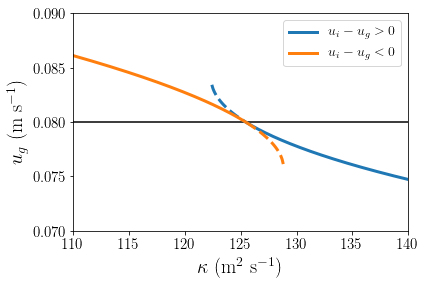

In [12]:
alpha = 0.87
A, B, C = quad_terms(f0, R, ui, Cdi, g, alpha, Cda, ua, rho_a, rho, K_colours)
ug_above = ((-B - np.sqrt(B**2 - 4.*A*C))/(2.*A))*g/f0/R
plt.plot(K_colours[ug_above<0.08], ug_above[ug_above<0.08], label='$u_i - u_g > 0$', linewidth=3)
plt.plot(K_colours[ug_above>0.08], ug_above[ug_above>0.08], '--', color='C0', linewidth=3)

A, B, C = quad_terms_below_crit(f0, R, ui, Cdi, g, alpha, Cda, ua, rho_a, rho, K_colours)
ug_below = ((-B - np.sqrt(B**2 - 4.*A*C))/(2.*A))*g/f0/R
plt.plot(K_colours[ug_below>0.08], ug_below[ug_below>0.08], label='$u_i - u_g < 0$', linewidth=3)
plt.plot(K_colours[ug_below<0.08], ug_below[ug_below<0.08], '--', color='C1', linewidth=3)


plt.legend()
plt.hlines(0.08, 0, 1500)
plt.xlim(110,140)
plt.ylim(0.07, 0.09)
plt.ylabel('$u_g$ (m s$^{-1}$)', fontsize=20)
plt.xlabel('$\kappa$ (m$^{2}$ s$^{-1}$)', fontsize=20)
plt.tick_params(labelsize=15)
# plt.savefig('/Users/doddridge/Desktop/ice_geo_velocity_comparison.pdf', bbox_inches='tight')

## Timescale figure

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in

Text(-0.2,1,'b)')

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


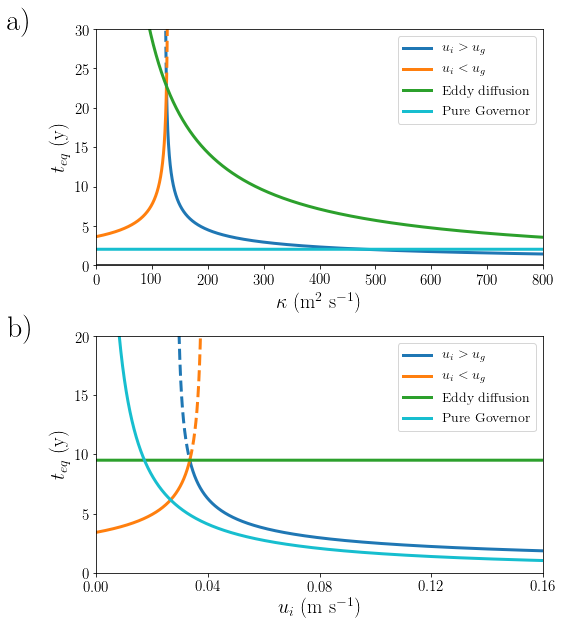

In [13]:
fig = plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace=0.3)

ax = fig.add_subplot(211)

alpha = 0.87
f0 = 1.4e-4
ui = 8e-2
Cdi = 5.5e-3
g = 6.22e-2
alpha = 0.87
Cda = 0.00125
ua = 4
rho_a = 1.25
rho = 1028


A, B, C = quad_terms(f0, R, ui, Cdi, g, alpha, Cda, ua, rho_a, rho, K_colours)

gamma = np.sqrt(B**2 - 4.*A*C)*86400*365

A, B, C = quad_terms_below_crit(f0, R, ui, Cdi, g, alpha, Cda, ua, rho_a, rho, K_colours)

gamma_below = np.sqrt(B**2 - 4.*A*C)*86400*365

gamma_eddies = (K_colours/R**2)*86400*365

gamma_gov = ((g*Cdi*ui)/((f0*R)**2))*86400*365


plt.plot(K_colours[ug_above>0.08], 1/gamma[ug_above>0.08], '--', linewidth=3, color='C0')
plt.plot(K_colours[ug_above<0.08], 1/gamma[ug_above<0.08], label='$u_i > u_g$', linewidth=3, color='C0')
plt.plot(K_colours[ug_below>0.08], 1/gamma_below[ug_below>0.08], label='$u_i < u_g$', linewidth=3, color='C1')
plt.plot(K_colours[ug_below<0.08], 1/gamma_below[ug_below<0.08], '--', linewidth=3, color='C1')
plt.plot(K_colours[K_colours>0], 1/gamma_eddies[K_colours>0], linewidth=3, label='Eddy diffusion', color='C2')
plt.plot(K_colours, 0*K_colours + (1/gamma_gov), linewidth=3, label='Pure Governor', color='C9')
plt.legend()
plt.hlines(0, 0, 1500)
plt.vlines(0, 0, 5e-8)
plt.xlim(0, 800)
plt.ylim(0, 30)
# plt.xlim(0, 250)
# plt.ylim(0, 0.3)
plt.tick_params(labelsize=15)
plt.ylabel('$t_{eq}$ (y)', fontsize=20)
plt.xlabel('$\kappa$ (m$^{2}$ s$^{-1}$)', fontsize=20)


ax.text(-0.2,1, 'a)', fontsize=30, transform=ax.transAxes)


##################################

# as a function of ui

ax = fig.add_subplot(212)

f0 = 1.4e-4
ui = np.linspace(0, 16e-2, 10000)
Cdi = 5.5e-3
g = 6.22e-2
alpha = 0.87
Cda = 0.00125
ua = 4
rho_a = 1.25
rho = 1028
kappa = 300

del A, B, C

A, B, C = quad_terms(f0, R, ui, Cdi, g, alpha, Cda, ua, rho_a, rho, kappa)

gamma = np.sqrt(B**2 - 4.*A*C)*86400*365
A, B, C = quad_terms_below_crit(f0, R, ui, Cdi, g, alpha, Cda, ua, rho_a, rho, kappa)

gamma_below = np.sqrt(B**2 - 4.*A*C)*86400*365
gamma_eddies = ui*0 + (kappa/R**2)*86400*365
gamma_gov = ((g*Cdi*ui)/((f0*R)**2))*86400*365


plt.plot(ui[gamma<gamma_eddies], 1/gamma[gamma<gamma_eddies], '--', linewidth=3, color='C0')
plt.plot(ui[gamma>gamma_eddies], 1/gamma[gamma>gamma_eddies], label='$u_i > u_g$',
         linewidth=3, color='C0')
plt.plot(ui[gamma_below>gamma_eddies], 1/gamma_below[gamma_below>gamma_eddies],
         label='$u_i < u_g$', linewidth=3, color='C1')
plt.plot(ui[gamma_below<gamma_eddies], 1/gamma_below[gamma_below<gamma_eddies],
         '--', linewidth=3, color='C1')
plt.plot(ui, 1/gamma_eddies, linewidth=3, label='Eddy diffusion', color='C2')
plt.plot(ui, 1/gamma_gov, linewidth=3, label='Pure Governor', color='C9')
plt.legend()
# plt.hlines(0, 0, 1500)
plt.vlines(0, 0, 5e-8)
plt.xlim(0, 0.16)
plt.ylim(0, 20)
plt.xticks([0, 0.04, 0.08, 0.12, 0.16])
plt.tick_params(labelsize=15)
plt.ylabel('$t_{eq}$ (y)', fontsize=20)
plt.xlabel('$u_{i}$ (m s$^{-1}$)', fontsize=20)

ax.text(-0.2,1, 'b)', fontsize=30, transform=ax.transAxes)


# plt.savefig('/Users/doddridge/Desktop/timescale_comparison.pdf', bbox_inches='tight')